<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction to Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
movie_df=pd.read_csv('./../data/processed/IMDbMovies_processed.csv')
movie_df.sample(10)

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime (Minutes),Release Year,Rating (Out of 10),Number of Ratings (in thousands),Budget (in milions),Gross in US & Canada (in milions),Gross worldwide (in milions),Opening Weekend Gross in US & Canada (in milions)
4989,Paddington in Peru,Follows Paddington and the Brown family as the...,Dougal Wilson,"Michael Bond,Simon Farnaby,Mark Burton","Adventure,Comedy,Family",NaN,108.8,2024.0,6.5,125.2,67.8,46.800000,87.100000,12.500000
2738,Wolfs,Follows two lone wolf fixers who are assigned ...,Jon Watts,Jon Watts,Thriller,Not Rated,105.0,2011.0,6.5,125.2,67.8,46.800000,87.100000,12.500000
7854,Fearless,A biography of Chinese Martial Arts Master Huo...,Ronny Yu,"Richard Epcar(dubbed version),Richard Epcar,Ch...","Action,Biography,Drama",PG-13,104.0,2006.0,7.6,78.0,67.8,24.633730,68.072848,10.564000
3320,Surrounded,Former Buffalo Soldier Mo Washington travels W...,Anthony Mandler,"Justin Thomas,Andrew Pagana","Drama,Western",R,100.0,2023.0,5.9,1.1,67.8,46.800000,87.100000,12.500000
513,Blue Valentine,The relationship of a contemporary married cou...,Derek Cianfrance,"Cami Delavigne,Joey Curtis,Derek Cianfrance","Drama,Romance",R,112.0,2010.0,7.3,208.0,1.0,9.706328,15.440333,0.193728
1583,The Bourne Ultimatum,Jason Bourne dodges a ruthless C.I.A. official...,Paul Greengrass,"George Nolfi,Scott Z. Burns,Tony Gilroy","Action,Mystery,Thriller",PG-13,115.0,2007.0,8.0,652.0,110.0,227.471070,444.100035,69.283690
2776,High Tension,Best friends Marie and Alexia decide to spend ...,Alexandre Aja,"Alexandre Aja,Grégory Levasseur",Horror,R,91.0,2003.0,6.7,77.0,2.2,3.681066,6.291958,1.897705
5180,East of Eden,Two brothers in 1910s California struggle to m...,Elia Kazan,"John Steinbeck,Paul Osborn",Drama,PG,118.0,1955.0,7.8,48.0,67.8,46.800000,0.024348,12.500000
1663,RoboCop 3,Robocop saves the day once more. This time the...,Fred Dekker,"Edward Neumeier,Michael Miner,Frank Miller","Action,Crime,Sci-Fi",PG-13,104.0,1993.0,4.1,53.0,22.0,10.696210,10.696210,4.304829
6956,Madea's Big Happy Family,"The crazy and comical Mabel Simmons, otherwise...",Tyler Perry,NaN,"Comedy,Drama",PG-13,106.0,2011.0,4.8,8.5,25.0,53.345287,54.161287,25.068677


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Title                                              9083 non-null   object 
 1   Summary                                            9083 non-null   object 
 2   Director                                           9052 non-null   object 
 3   Writer                                             8759 non-null   object 
 4   Main Genres                                        9076 non-null   object 
 5   Motion Picture Rating                              8285 non-null   object 
 6   Runtime (Minutes)                                  9083 non-null   float64
 7   Release Year                                       9076 non-null   float64
 8   Rating (Out of 10)                                 9083 non-null   float64
 9   Number o

> **NOTES:**
>
> - The dataset: The sample consists of 9083 movies from popular films according to https://www.kaggle.com/datasets/elvinrustam/imdb-movies-dataset/data

# Question 1: Does a movie with high scores tend to have high gross?

## Step 0: Purpose

- Consider the impact of ratings on movie gross
- Determine the impact of scores on gross so filmmakers know the important factors that help them increase gross

## Step 1: Analyzing

In [4]:
#Filter out columns 'Title', 'Rating (Out of 10)' and 'Gross worldwide (in milions)'
df = movie_df[['Title', 'Rating (Out of 10)', 'Gross worldwide (in milions)']]
df

,Title,Rating (Out of 10),Gross worldwide (in milions)
0,Napoleon,6.7,84.968381
1,The Hunger Games: The Ballad of Songbirds & Sn...,7.2,191.729235
2,The Killer,6.8,0.421332
3,Leo,7.0,87.100000
4,Thanksgiving,7.0,29.666585
...,...,...,...
9078,Over the Moon,6.3,87.100000
9079,Young Adam,6.4,2.561820
9080,The Greatest Show on Earth,6.5,36.000000
9081,Deep Water,6.5,87.100000


## Step 2: Visualization

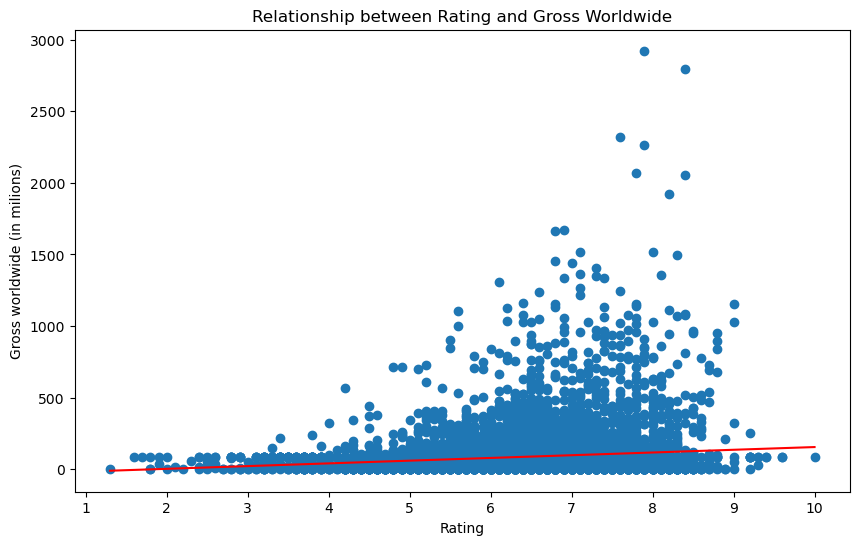

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating (Out of 10)'], df['Gross worldwide (in milions)'])

coefs = np.polyfit(df['Rating (Out of 10)'], df['Gross worldwide (in milions)'], 1)
line = np.poly1d(coefs)
x = np.linspace(df['Rating (Out of 10)'].min(), df['Rating (Out of 10)'].max())
plt.plot(x, line(x), color='red')

plt.xlabel('Rating')
plt.xticks(range(int(df['Rating (Out of 10)'].min()), int(df['Rating (Out of 10)'].max()) + 1))
plt.ylabel('Gross worldwide (in milions)')
plt.title('Relationship between Rating and Gross Worldwide')

plt.show()

## Step 3: Give observations

- Based on the scatter plot, the upward regression line shows a positive relationship between score and revenue
- However, the regression line points only slightly upward and the scatter points are concentrated toward the bottom of the chart
- We see that the highest grosses of movie are up to 3000 million dollars. However, only a few movies with high ratings have high grosses. There are many movies with grosses under 1000 million dollars and ratings from 5 to 9, most of them under 500 milion dollars
- Scores are not an important factor affecting movie gross because movies with ratings as high as 9 also have grosses mostly under 1000 million dollars but movies with ratings around 5 also have similar grosses.

# Question 2: Determine the ideal runtime for a movie

## Step 0: Purpose
- Based on good quality movies to determine the ideal runtime for a movie

## Step 1: Analyzing

In [6]:
#Filter out columns 'Title', 'Runtime (Minutes)', 'Rating (Out of 10)' and 'Gross worldwide (in milions)'
df = movie_df[['Title', 'Runtime (Minutes)', 'Rating (Out of 10)', 'Gross worldwide (in milions)']]

#Calculate the 75th percentile of rating and gross
rating_75 = df['Rating (Out of 10)'].quantile(0.75)
gross_75 = df['Gross worldwide (in milions)'].quantile(0.75)

#Filter out good quality movies with their ratings and grosses above the 75th percentile
df = df[(df['Rating (Out of 10)'] >= rating_75) & (df['Gross worldwide (in milions)'] >= gross_75)]
df

,Title,Runtime (Minutes),Rating (Out of 10),Gross worldwide (in milions)
1,The Hunger Games: The Ballad of Songbirds & Sn...,157.0,7.2,191.729235
5,Oppenheimer,180.0,8.5,950.554020
10,Killers of the Flower Moon,206.0,8.0,152.178693
14,The Hunger Games,142.0,7.2,695.220619
31,Mission: Impossible - Dead Reckoning Part One,163.0,7.8,567.535383
...,...,...,...,...
9024,Zoey's Extraordinary Christmas,99.0,7.2,87.100000
9048,The Cloud-Capped Star,126.0,7.8,87.100000
9050,Private Life,123.0,7.2,87.100000
9059,Baahubali 2: The Conclusion,167.0,8.2,254.158390


## Step 2: Visualization

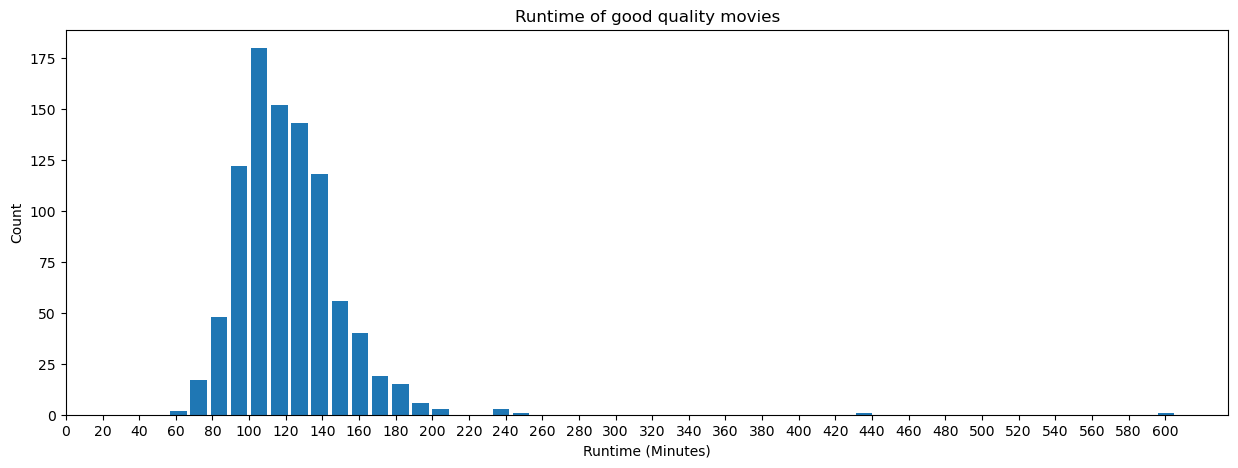

In [7]:
plt.figure(figsize=(15, 5))
plt.hist(df['Runtime (Minutes)'], bins=50, width=9)

plt.xlabel('Runtime (Minutes)')
plt.ylabel('Count')
plt.title('Runtime of good quality movies')
plt.xticks(np.arange(0, int(df['Runtime (Minutes)'].max()), 20))

plt.show()

## Step 3: Give observation

- Based on the chart, we see that most good movies have a runtime between 90 and 140 minutes
- Therefore, movie makers should produce films of reasonable runtime to get the best rating and gross

# Question 3: Movie profit statistics over the years

## Step 0: Purpose
- Statistics on movie profits each year to know the business performance of the movie industry from 1921 to 2020

## Step 1: Analyzing

In [84]:
#Filter out columns 'Title', 'Release Year', 'Budget (in milions)' and 'Gross worldwide (in milions)'
df = movie_df[['Title', 'Release Year', 'Budget (in milions)', 'Gross worldwide (in milions)']]
df = df[(df['Release Year'] >= 1920) & (df['Release Year'] < 2020)]

#Calculate and create column Profit (in milions)
df['Profit (in milions)'] = df['Gross worldwide (in milions)'] - df['Budget (in milions)']

#Split the data into 10-year intervals
df['Decade'] = pd.cut(df['Release Year'], bins=range(1920, 2021, 10), right=False)

#Calculate total & average each decades
profit_df = df.groupby('Decade')['Profit (in milions)'].agg(['mean', 'sum'])
profit_df

,mean,sum
Decade,,
"[1920, 1930)",2.619976,31.439714
"[1930, 1940)",23.458388,1102.544257
"[1940, 1950)",18.390203,1710.288919
"[1950, 1960)",24.674825,4120.695821
"[1960, 1970)",19.009093,4619.209719
"[1970, 1980)",35.710972,15534.272702
"[1980, 1990)",-15.055914,-11984.507188
"[1990, 2000)",40.330260,44726.258499
"[2000, 2010)",51.790398,83123.588234


## Step 2: Visualization

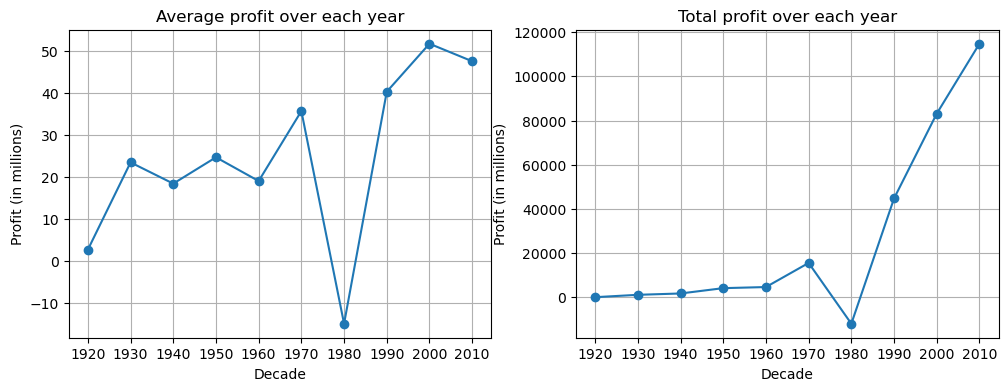

In [91]:
#Convert column "Decade" to a list of integers
decades = [int(i.left) for i in profit_df.index]

plt.figure(figsize=(12, 4))

#Mean profit
plt.subplot(1, 2, 1)
plt.plot(decades, profit_df['mean'], marker='o')

plt.xlabel('Decade')
plt.ylabel('Profit (in millions)')
plt.title('Average profit over each year')

plt.xticks(decades)
plt.grid(True)

#Sum profit
plt.subplot(1, 2, 2)
plt.plot(decades, profit_df['sum'], marker='o')

plt.xlabel('Decade')
plt.ylabel('Profit (in millions)')
plt.title('Total profit over each year')

plt.xticks(decades)
plt.grid(True)

plt.show()

## Step 3: Give observation

- Based on the chart, we see that average profits and total profits tend to increase steadily each year, especially in the 1980s they decreased sharply but then increased again
- However, the average profit is very small compared to the total profit, which means that the number of movies increased very quickly, especially after the 1980s
- Since then, we can see that the movie industry is developing very quickly with the number of movies increasing rapidly and stable profits